# Молекула H2

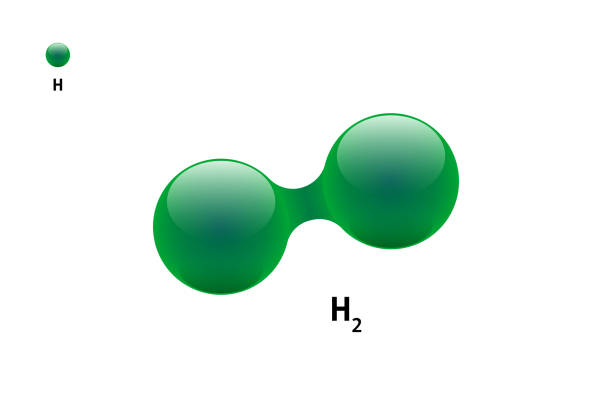
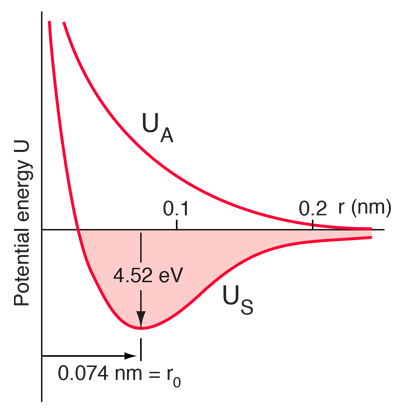

## Хімічна точність

У квантовій хімії часто говорять про **хімічну точність** — це відхилення енергії не більше ніж  

$$
1 \ \text{kcal/mol} \;\; \approx \; 0.0016\ \text{a.u.}
$$

Така точність вважається достатньою, щоб правильно передбачати більшість хімічних властивостей:  
- стабільність ізомерів,  
- енергії реакцій,  
- бар’єри переходів.  

Coupled Clusters (наприклад, CCSD(T)) зазвичай досягають хімічної точності для малих і середніх молекул.


## Експериментальні дані

| Параметр                                 | Значення         | Одиниці     |
|------------------------------------------|------------------|-------------|
| Рівноважна довжина зв'язку $R_{\min}$    | 0.741            | Å           |
| Енергія дисоціації $E_{\min}$            | 0.166            | a.u.        |



# Розрахунки

In [1]:
from pyscf import gto, scf, cc
import numpy as np
import matplotlib.pyplot as plt

In [2]:
basis = 'cc-PVDZ'

In [3]:
# дрібний крок біля мінімуму
R1 = np.arange(0.25, 1.25, 0.05)  # щільна сітка

# великий крок далеко від мінімуму
R2 = np.arange(1.25, 5.0, 0.25)   # рідка сетка

# об'єднуємо в один масив
distances = np.concatenate([R1, R2])

## Сканування ППЕ методом HF

In [4]:
R = []
E_triplet = []
E_singlet = []

In [5]:
scanner_triplet = gto.M(verbose=0).apply(scf.UHF).as_scanner()
scanner_singlet = gto.M(verbose=0).apply(scf.RHF).as_scanner()
for r in distances:
    e_triplet = scanner_triplet(gto.M(atom=f"H 0 0 0; H 0 0 {r}", basis=basis, spin=2))
    e_singlet = scanner_triplet(gto.M(atom=f"H 0 0 0; H 0 0 {r}", basis=basis, spin=0))
    R.append(r)
    E_triplet.append(e_triplet)
    E_singlet.append(e_singlet)

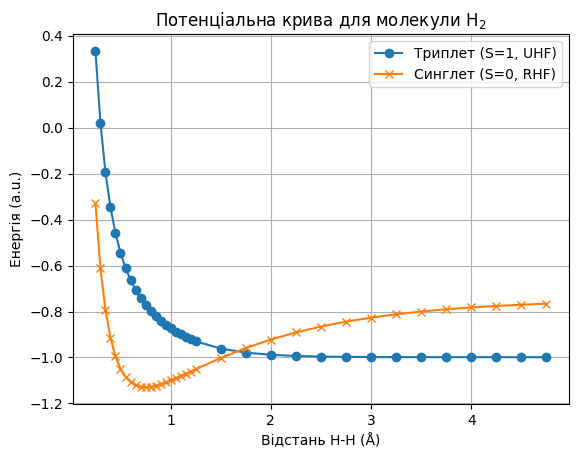

In [6]:
# малюємо графік
plt.plot(R, E_triplet, marker="o", label="Триплет (S=1, UHF)")
plt.plot(R, E_singlet, marker="x", label="Синглет (S=0, RHF)")
plt.xlabel("Відстань H-H (Å)")
plt.ylabel("Енергія (a.u.)")
plt.title(r'Потенціальна крива для молекули $\mathrm{{H}}_2$')
plt.legend()  # додаємо легенду
plt.grid(True)
plt.show()